## PYTHON PROJECT:ABC COMPANY ANALYSIS

Dataset from ABC company, consisting of 458 rows and 9 columns. The company requires a comprehensive report detailing information about their employees across various teams. Your tasks include preprocessing the dataset, analyzing the data, and presenting your findings graphically


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("ABC_DATA.xlsx")

In [3]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [4]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None


## Preprocessing:


Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
Ensure data consistency and integrity before proceeding with analysis. (1 mark)

In [6]:
# Replace "height" column with random values between 150 and 180
df["Height"] = np.random.randint(150, 181, size=len(df))


In [7]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,177,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,167,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,157,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,150,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,157,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,164,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,176,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,153,220,Oklahoma State,3431040.0


In [8]:
# Check for missing values
print(df.isnull().sum())


Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


Analysis of Missing Values:
1. "College" has 84 missing values-not be a critical column for analysis
2. "Salary" has 11 missing values-important column for salary-related analysis, so missing values must be handled properly.


In [9]:
# Use the median salary to fill missing values:
df["Salary"].fillna(df["Salary"].median(), inplace=True)


In [10]:
# "College" is not essential,fill missing values with "Unknown":
df["College"].fillna("Unknown", inplace=True)


In [11]:
# Check for missing values
print(df.isnull().sum())

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [12]:
# Analysis Tasks:


#### 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks) 


In [22]:
# distribution of employees in each team
team_distribution = df["Team"].value_counts()

#percentage split relative to the total number of employees
team_percentage = (team_distribution / len(df)) * 100

print("Team Distribution (Number of Employees across each team):")
print(team_distribution)

print("\nPercentage Distribution:")
print(team_percentage)


Team Distribution (Number of Employees across each team):
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

Percentage Distribution:
New Orleans Pelicans 

#### 2. Segregate employees based on their positions within the company. (2 marks) 

In [29]:
position_distribution = df["Position"].value_counts()
print("Segregation by Positions:")
print(position_distribution)



Segregation by Positions:
SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64


#### 3. Identify the predominant age group among employees. (2 marks) 



In [30]:
age_distribution = df['Age'].value_counts()
age_distribution

24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: Age, dtype: int64

In [32]:


# Define age bins
age_bins = [20, 30, 40, 50, 60]
age_labels = ["20-29", "30-39", "40-49", "50-59"]
df["age_group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

# Count age groups
age_distribution = df["age_group"].value_counts()
print(age_distribution)

20-29    346
30-39     91
40-49      0
50-59      0
Name: age_group, dtype: int64


In [33]:
predominant_age_group = df['age_group'].value_counts().idxmax()

In [35]:
print("Predominant Age Group is: ",predominant_age_group)

Predominant Age Group is:  20-29


#### 4. Discover which team and position have the highest salary expenditure. (2 marks)

In [36]:
salary_expenditure = df.groupby(['Team','Position'])['Salary'].sum().reset_index()  

In [37]:
max_expenditure = salary_expenditure.loc[salary_expenditure['Salary'].idxmax()]  

In [40]:
print("Highest Salary Expenditure by Team and Position:")
print(max_expenditure)

Highest Salary Expenditure by Team and Position:
Team        Los Angeles Lakers
Position                    SF
Salary              31866445.0
Name: 67, dtype: object


#### 5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

In [47]:
correlation = df["Age"].corr(df["Salary"])
print("Correlation between Age and Salary:",correlation) 


Correlation between Age and Salary: 0.2091241911519606


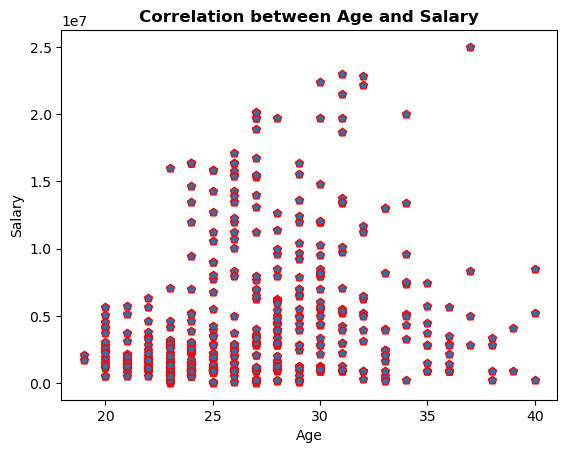

In [96]:
#Visual representation of correlation between Age and Salary 
plt.scatter(df['Age'],df['Salary'],marker ='p',edgecolors='r')
plt.title('Correlation between Age and Salary', fontweight="bold")
plt.xlabel('Age')  
plt.ylabel('Salary')  
plt.show()

## Graphical Representation:

#### For each of the five analysis tasks, create appropriate visualizations to present your findings effectively. (5x2 = 10 marks) 

In [49]:
# 1. Employee Distribution Across Teams (Bar Chart)

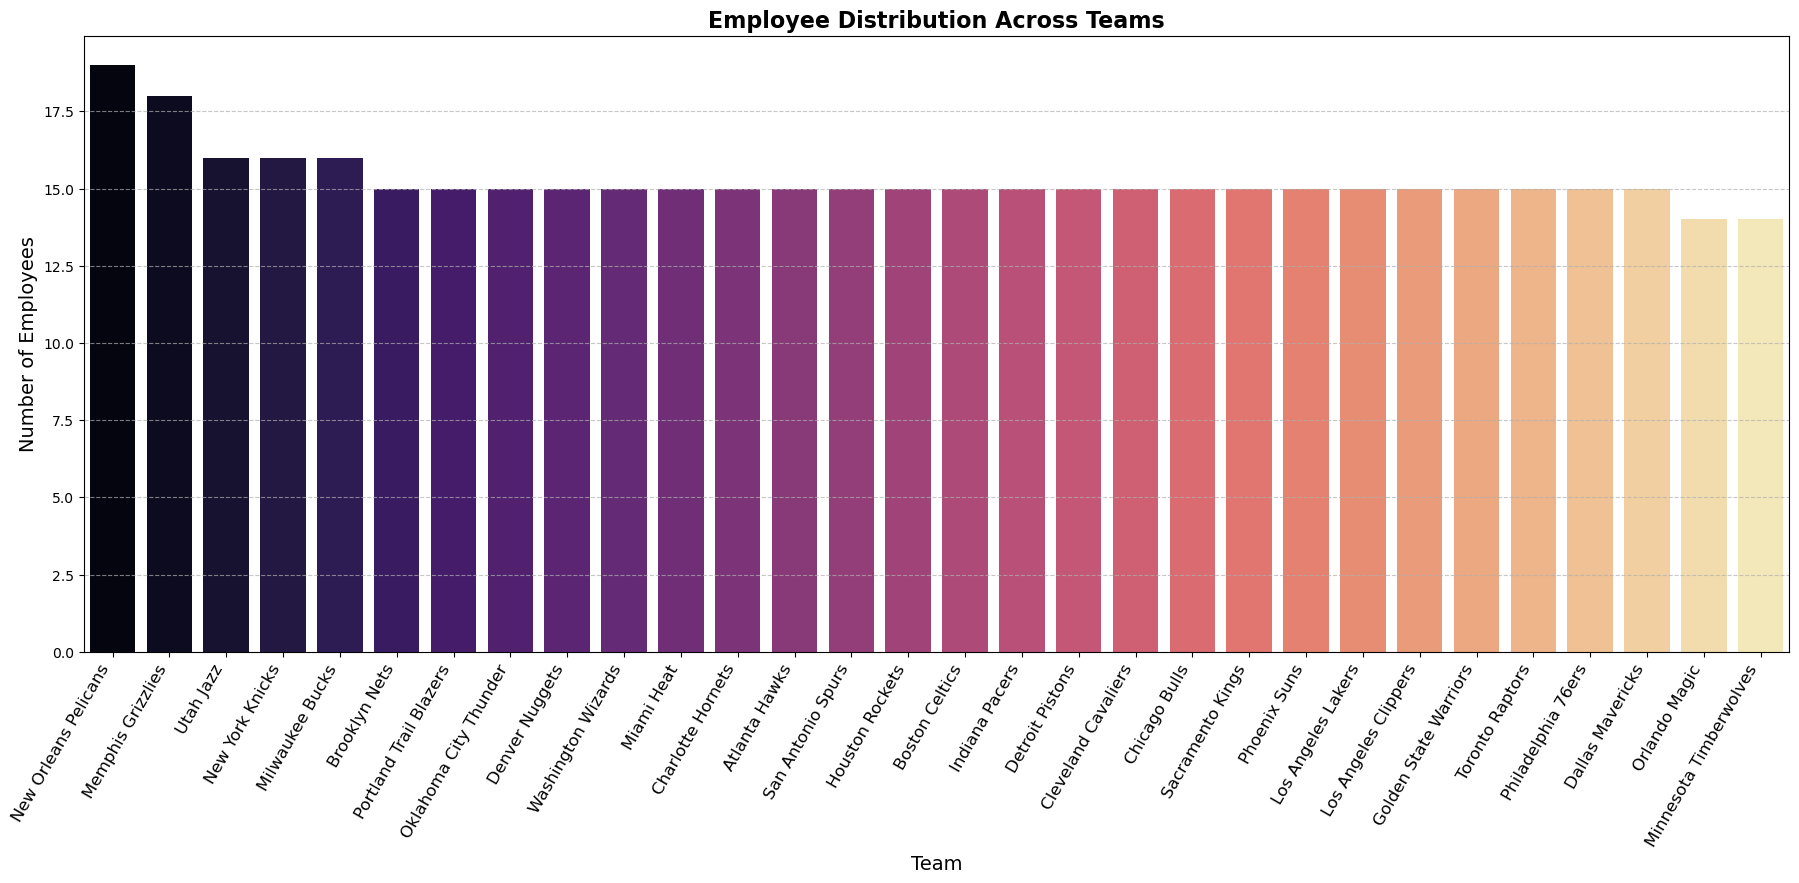

In [95]:
plt.figure(figsize=(22,8))
sns.barplot(x=team_distribution.index, y=team_distribution.values, palette="magma")
plt.xticks(rotation=60, ha="right", fontsize=12) 
plt.xlabel("Team", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.title("Employee Distribution Across Teams", fontsize=16, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # horizontal gridlines
plt.show()


Insights from the Graph:

1. The team with the highest number of employees appears to be New Orleans Pelicans, followed by Memphis Grizzlies.
2. Other teams have relatively similar distributions, with a gradual decline in the number of employees.
3. The team with the least number of employees is Minnesota Timberwolves.

In [53]:
# 2. Employees by Position (Pie Chart)

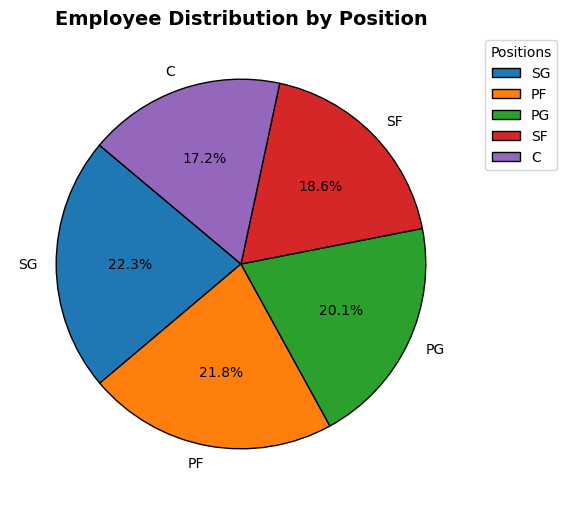

In [86]:
plt.figure(figsize=(6,6))
plt.pie(position_distribution,
        labels=position_distribution.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={"edgecolor": "black", "linewidth": 1} 
       )
plt.title("Employee Distribution by Position", fontsize=14, fontweight="bold")
plt.legend(title="Positions", loc="upper right", bbox_to_anchor=(1.2, 1))  # Move legend outside
plt.show()


Insights from the graph:
    
1. SG have the highest representation-22.3%
2. C have the least representation-17.2%
3. PF have the second highest reprsentation-21.8%
4. PG and SF are moderately represented-20.1% & 18.6%
5. overall it shows a balanced distribution of employee by position

In [54]:
# 3. Predominant Age Group (Histogram)

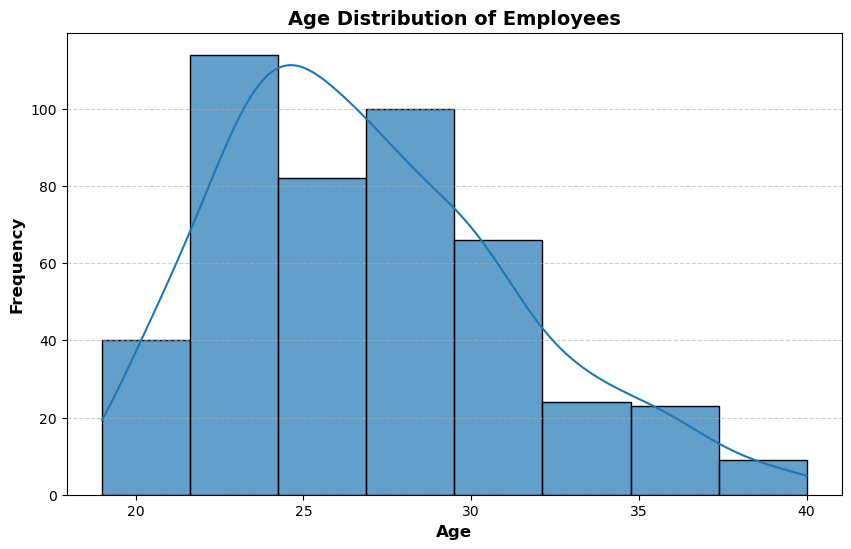

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"], bins=8, kde=True, alpha=0.7, edgecolor="black")
plt.xlabel("Age", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.title("Age Distribution of Employees", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6) 
plt.show()


Insights from the graph:

1. Most employees are in the 22-28 age group
2. Gradual decline in older age groups is visible
3. Peak age distribution is around 25- most common age among employees.
4. The company might be hiring fresh graduates,focus on hiring younger employees.
    


In [63]:
# 4. Salary Expenditure (Bar Charts)

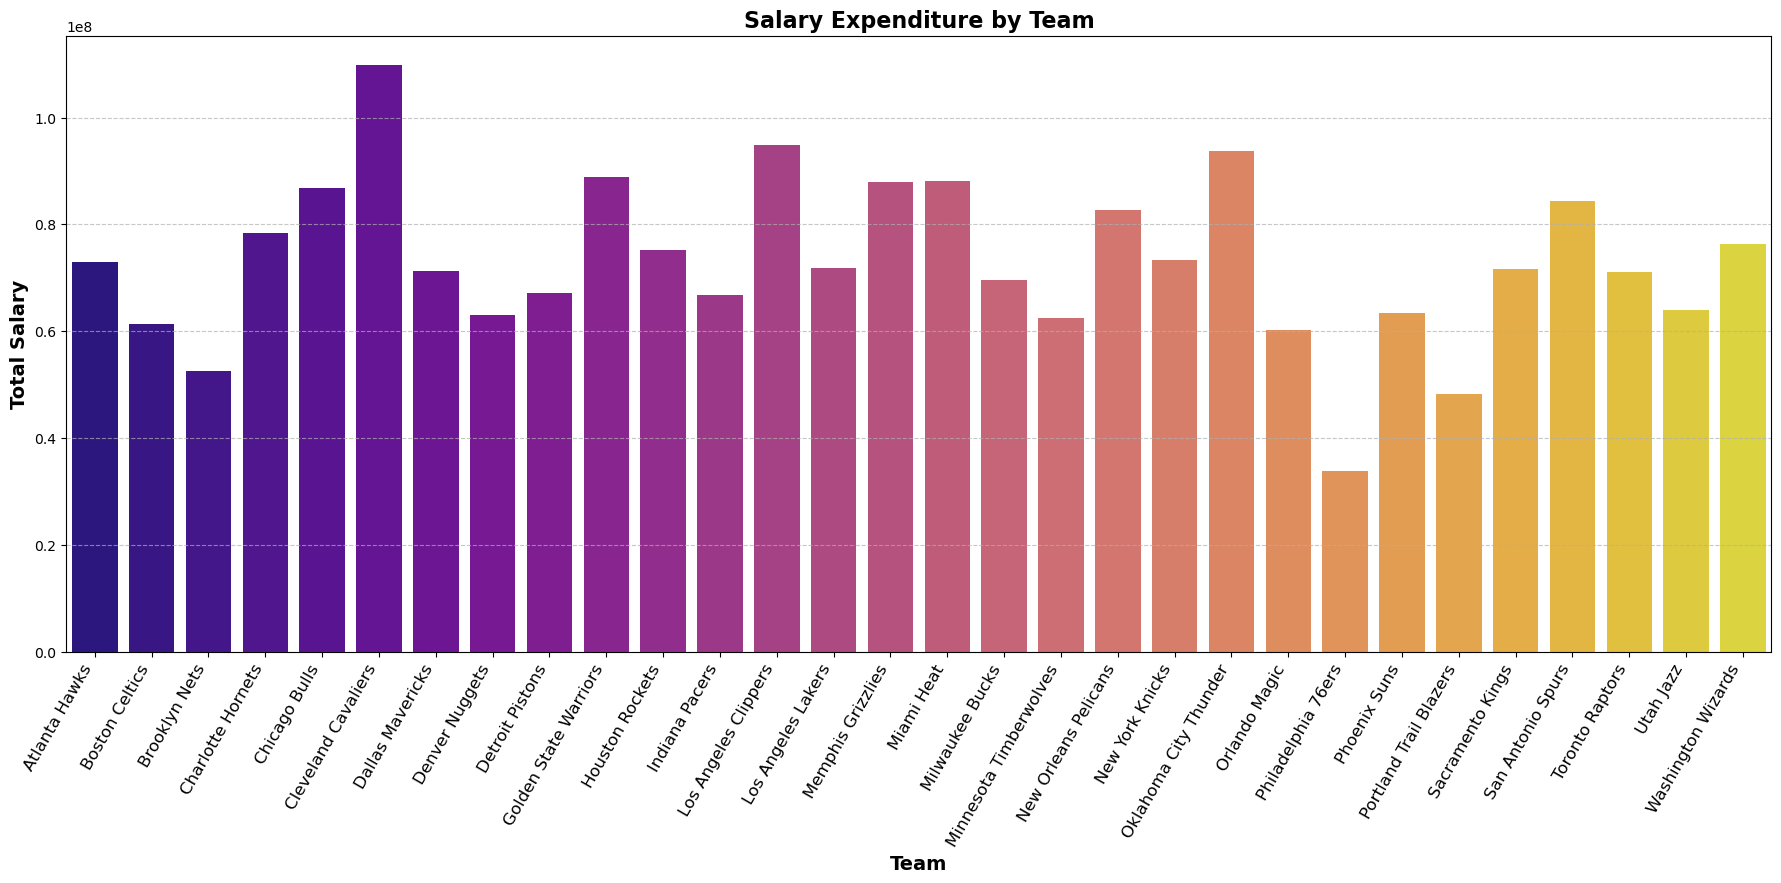

In [94]:
plt.figure(figsize=(22,8))
sns.barplot(x=team_salary.index, y=team_salary.values, palette="plasma")
plt.xticks(rotation=60, ha="right", fontsize=12) 
plt.xlabel("Team", fontsize=14, fontweight="bold")
plt.ylabel("Total Salary", fontsize=14, fontweight="bold")
plt.title("Salary Expenditure by Team", fontsize=16, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # horizontal gridlines
plt.show()


Insights from the graph:

1. Cleveland Cavaliers have the highest salary expenditure.
2. Other High-Spending Teams: Los Angeles Lakers, Okhlahoma city thunder
3. Philadelphia 76ers is the team with lower salary expenditure.
4. Lower Salary Expenditure Teams: Philadelphia 76ers, Portland Trail Blazers, and Brooklyn Nets


In [60]:
# 5. Age vs Salary (Scatter Plot)

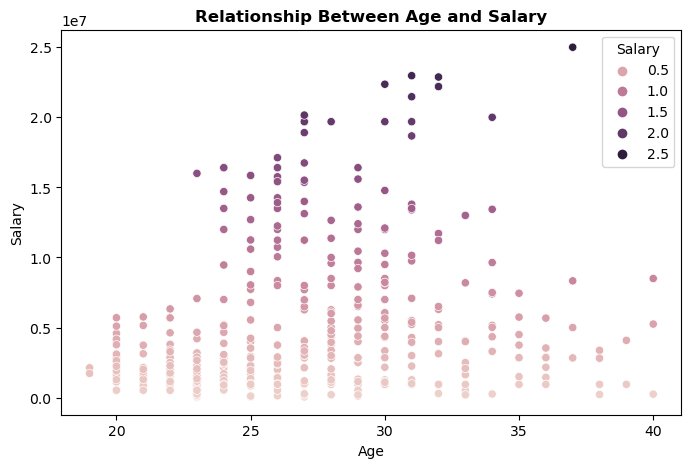

In [97]:
plt.figure(figsize=(8,5))
x = df["Age"]
y=df["Salary"]
plt.title('Relationship Between Age and Salary', fontweight="bold")
sns.scatterplot(x=x,y=y,hue=df["Salary"])
plt.show()

Insights from the graph :
    
1. Peak Salaries Around Ages 25-30
2. Salary Declines After 30+:Fewer high-salary points are observed after age 30, indicating that salaries generally decline as individuals age.
3. Wide salary gaps in mid-career
4. Some players in their early 30s still earn very high salaries (2.0-2.5).The 30-35 age range indicate a few high-salary individuals, even though the overall number of players in that age range is lower.

In [99]:
# heat map

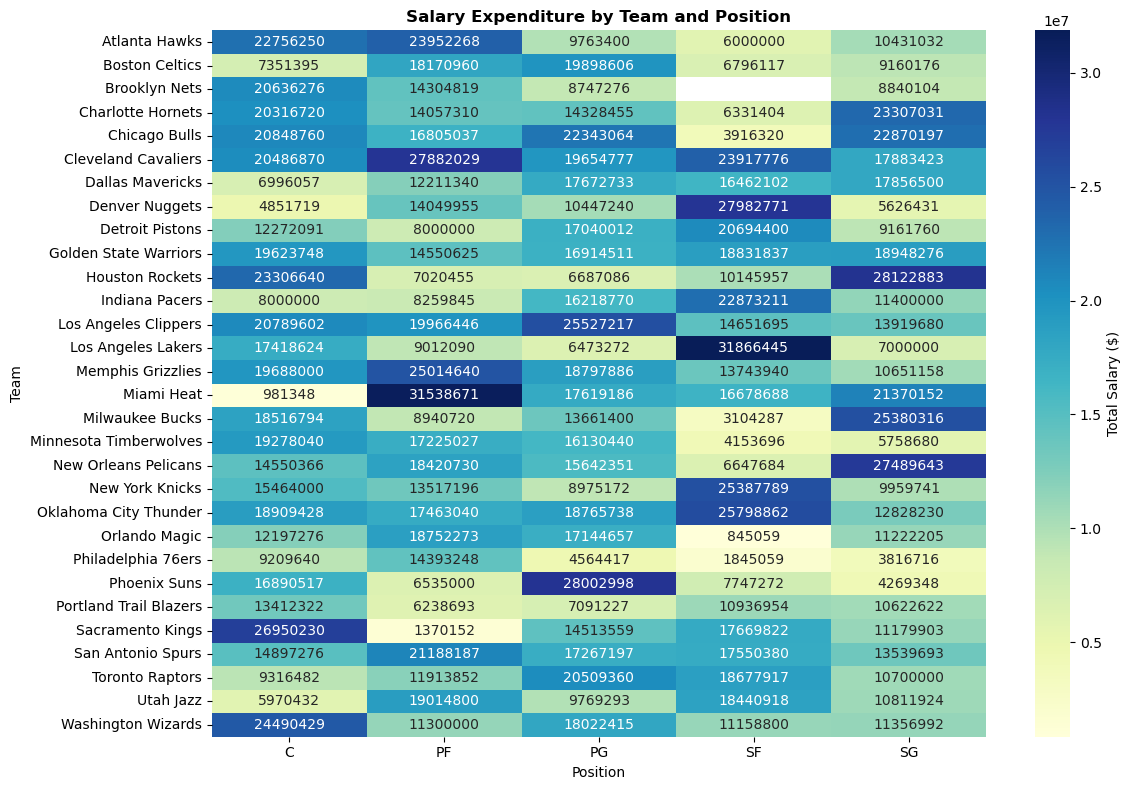

In [98]:
# Salary Expenditure by Team and Position 
salary_pivot = salary_expenditure.pivot(index='Team', columns='Position', values='Salary')

plt.figure(figsize=(12, 8))  
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Salary ($)'})  
plt.title('Salary Expenditure by Team and Position', fontweight="bold")  
plt.xlabel('Position')  
plt.ylabel('Team')  
plt.tight_layout()  
plt.show()

Insights from the graph:

1. Teams with the Highest Overall Salary Expenditure-darker shades (higher salary values across positions).
2. Position-Wise Salary Trends:PG and C position receive higher salaries.
3. Low Salary Teams (Lighter Shades)

## Data Story: 

Provide insights gained from the analysis, highlighting key trends, patterns, and correlations within the dataset. (3 marks) 

#### 1. Each segment of the code aims to manipulate the dataset, perform analyses, and visualize the results clearly.
#### 2. The majority of employees fall within the 25-30 age group, indicating that teams prefer players in their prime years.The predominant age group among employees is: 20-30.
####  A few older players (30-35 years) still earn significantly higher salaries, but their numbers are fewer, meaning only elite players sustain high earnings in later years.
####  3.The dataset highlights that salary is influenced by age, team strategy, and position. While younger players dominate in numbers, mid-career players (28-32 years) tend to earn the most. 
####  4.The correlation between age and salary is 0.21400, Employees who are between 25 and 35 have the highest salary.  
####  5. The distribution of employees across each team is almost same but The majority of employees are concentrated in 'New Orleans Pelicans' and the percentage of distribution is: 4.148472.
#### 6. Most employees work at 'SG' position. The count of employees work in SG Position is : 102 and  position PF has 100. Only 79 employees are works in C position.
    